In [ ]:
# Setup Path
from pathlib import Path

dataset_path = Path("C:/Users/arvin/Downloads/Project/image-recognition/datasets")
dataset_path.iterdir()

<generator object Path.iterdir at 0x0000023703CC7060>

In [ ]:
# Cek Folder Dataset
import os
os.listdir(dataset_path)


['test', 'train', 'validation']

In [ ]:
# Cek Folder Dataset
train_dir = os.path.join(dataset_path, "test")
os.listdir(train_dir)[:36]

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [ ]:
# Image Handler (Cek Class & Files)
import tensorflow as tf
import os

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_dir = os.path.join(dataset_path, "train")
val_dir   = os.path.join(dataset_path, "validation")
test_dir  = os.path.join(dataset_path, "test")

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)


c:\Users\arvin\Downloads\Project\image-recognition\venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


Found 3115 files belonging to 36 classes.
Found 351 files belonging to 36 classes.
Found 359 files belonging to 36 classes.


In [ ]:
# def class
class_names = train_ds.class_names
print(class_names)
print("Jumlah kelas:", len(class_names))

['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']
Jumlah kelas: 36


In [ ]:
# build model
import tensorflow as tf

layers = tf.keras.layers
models = tf.keras.models
num_classes = len(class_names)
print("num_classes =", num_classes)

# Default Size
IMG_SIZE = (224, 224)

# Ambil base model dari MobileNetV2
base_model = tf.keras.applications.MobileNetV2(
    input_shape=IMG_SIZE + (3,),
    include_top=False,          # buang classifier bawaan
    weights='imagenet'          # pakai bobot pretrained
)

# Otak tidak di train ulang (dibekukan)
base_model.trainable = False

# Preprocessing khusus MobileNetV2
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input


model = models.Sequential([
    layers.Input(shape=IMG_SIZE + (3,)), # Input Gambar

    # Preprocessing khas MobileNetV2
    layers.Lambda(preprocess_input),

    # Backbone (frozen)
    base_model, # Panggil Model

    # Ringkas fitur
    layers.GlobalAveragePooling2D(),

    # Classifier (HEAD)
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])


num_classes = 36


In [63]:
# hasil model
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda_2 (Lambda)               │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_6      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,426,596 (9.26 MB)

 Trainable params: 168,612 (658.64 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [64]:
# model compile
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [65]:
# Train model
EPOCHS = 5
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS
)


Epoch 1/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 70s 679ms/step - accuracy: 0.5974 - loss: 1.5310 - val_accuracy: 0.9003 - val_loss: 0.3875
Epoch 2/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 67s 681ms/step - accuracy: 0.8536 - loss: 0.4892 - val_accuracy: 0.9402 - val_loss: 0.2664
Epoch 3/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 64s 654ms/step - accuracy: 0.9175 - loss: 0.2888 - val_accuracy: 0.9430 - val_loss: 0.2273
Epoch 4/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 63s 632ms/step - accuracy: 0.9461 - loss: 0.1947 - val_accuracy: 0.9459 - val_loss: 0.1954
Epoch 5/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 63s 632ms/step - accuracy: 0.9647 - loss: 0.1380 - val_accuracy: 0.9430 - val_loss: 0.1750


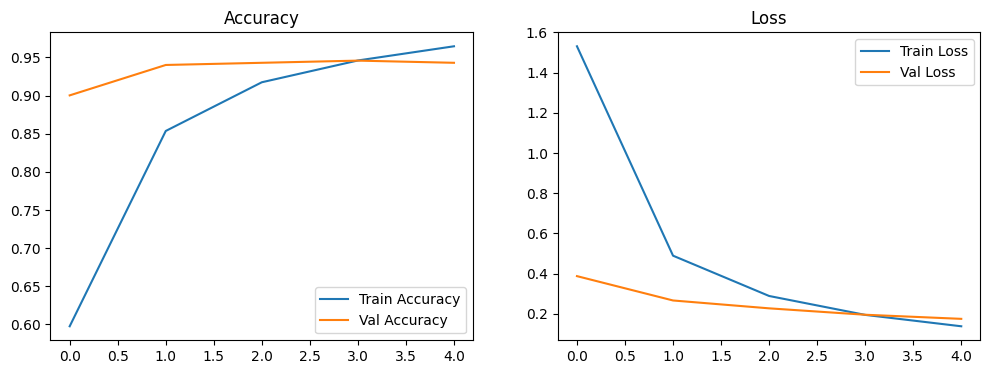

In [66]:
# Visualisasi Hasil

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.show()


In [67]:
# Test Model
test_loss, test_accuracy = model.evaluate(test_ds)

print("Test Loss     :", test_loss)
print("Test Accuracy :", test_accuracy)


12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 520ms/step - accuracy: 0.9415 - loss: 0.1748
Test Loss     : 0.17482073605060577
Test Accuracy : 0.941504180431366


In [78]:
from IPython.display import display
import ipywidgets as widgets

uploader = widgets.FileUpload(
    accept='image/*',  # hanya gambar
    multiple=False
)

display(uploader)

FileUpload(value=(), accept='image/*', description='Upload')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted : tomato
Confidence: 0.9313681


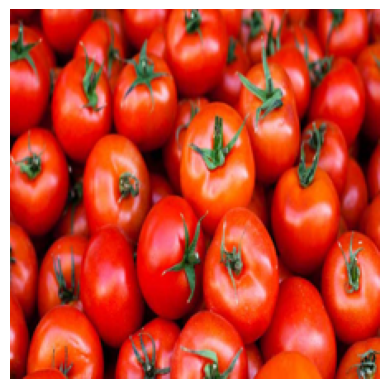

In [79]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
import io

# ambil file yang diupload
uploaded_file = uploader.value[0]
image_bytes = uploaded_file['content']

# buka gambar
img = Image.open(io.BytesIO(image_bytes)).convert("RGB")
img = img.resize(IMG_SIZE)

# tampilkan gambar
plt.imshow(img)
plt.axis("off")

# ubah ke array
img_array = np.array(img)
img_array = tf.expand_dims(img_array, axis=0)

# prediksi
pred = model.predict(img_array)
pred_class = np.argmax(pred[0])
confidence = np.max(pred[0])

print("Predicted :", class_names[pred_class])
print("Confidence:", confidence)
